In [39]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as pyplot
import seaborn as sns

In [40]:
df=pd.read_csv("Iris.csv",usecols=[0,1,2,3,4])
df.head()

,sepallength,sepalwidth,petallength,petalwidth,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   iris         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [42]:
df.iris.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Build model

In [43]:
iris_num={'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}
df["iris_num"]=[iris_num[i] for i in df.iris]
df.head()

,sepallength,sepalwidth,petallength,petalwidth,iris,iris_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [44]:
def makeColor(value):
    color="yelow"
    if value==0:
        color="red"
    elif value==1:
        color="green"
    else:
        color="blue"
    return color

<Axes: xlabel='petallength', ylabel='petalwidth'>

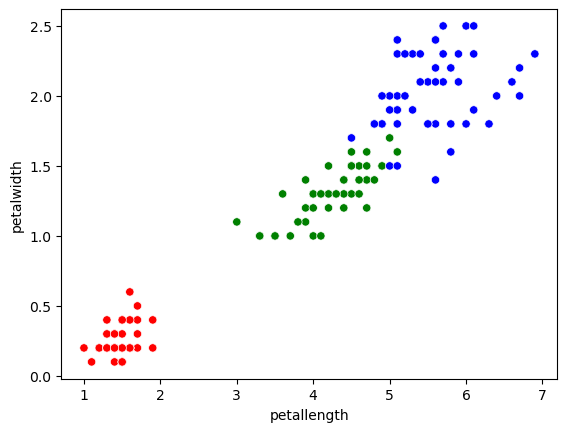

In [45]:
color=[makeColor(x) for x in df.iris_num.values]
sns.scatterplot(x=df.petallength, y=df.petalwidth,color=color)

<Axes: xlabel='petallength', ylabel='petalwidth'>

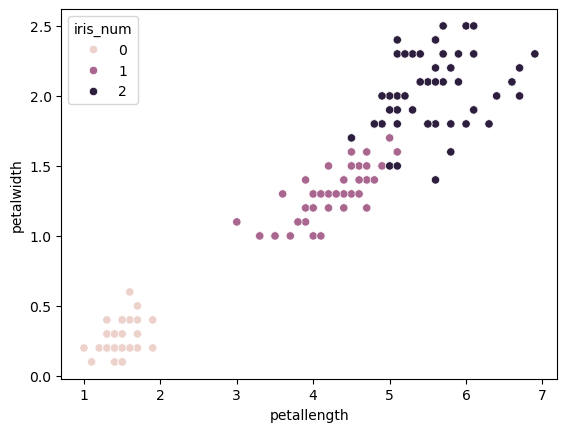

In [46]:
sns.scatterplot(x=df.petallength, y=df.petalwidth,data=df,hue="iris_num")

In [47]:
from sklearn.model_selection import train_test_split

In [51]:
x=df.drop(["iris","iris_num"],axis=1)
y=df.iris_num

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [66]:
k_max=np.sqrt(len(x_train))/2

In [ ]:
list_k=[]
list_acc=[]
k_max=np.sqrt(len(x_train))/2
for i in range(2,int(k_max) + 1):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    list_k.append(i)
    acc=accuracy_score(model.predict(x_test),y_test)
    list_acc.append(acc)
    # trong trường hợp mô hình đều có acc bằng nhau thì dùng độ lớn score train- test 
    # cái nào nhỏ nhất thì lấy
    print("accuracy core:",acc,
          ", k value: ",i,
          " |train-test|: ",np.abs(model.score(x_train,y_train)-model.score(x_test,y_test)))

accuracy core: 0.9777777777777777 , k value:  2  |train-test|:  0.006349206349206327
accuracy core: 0.9777777777777777 , k value:  3  |train-test|:  0.025396825396825418
accuracy core: 0.9777777777777777 , k value:  4  |train-test|:  0.025396825396825418
accuracy core: 0.9777777777777777 , k value:  5  |train-test|:  0.025396825396825418
